In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/file_02.csv')
data.head(10)

,index,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21
5,5,2017-09-02,Northern,624.23,507.42,30.36,35.69,273.27,317.19
6,6,2017-09-02,Western,"1,106.89","1,050.91",25.17,3.83,72.00,23.97
7,7,2017-09-02,Southern,576.66,562.79,62.73,52.76,111.57,59.49
8,8,2017-09-02,Eastern,441.02,425.75,NaN,NaN,85.94,74.18
9,9,2017-09-02,NorthEastern,29.11,16.50,NaN,NaN,24.64,20.81


In [ ]:
data.shape

(4945, 9)

In [ ]:
print('Data from:',data['Date'].unique().min(),'to:',data['Date'].unique().max())

Data from: 2017-09-01 to: 2020-08-01


In [ ]:
data['Region'].unique()

array(['Northern', 'Western', 'Southern', 'Eastern', 'NorthEastern'],
      dtype=object)

In [ ]:
data.isnull().sum()

index                                      0
Date                                       0
Region                                     0
Thermal Generation Actual (in MU)          0
Thermal Generation Estimated (in MU)       0
Nuclear Generation Actual (in MU)       1978
Nuclear Generation Estimated (in MU)    1978
Hydro Generation Actual (in MU)            0
Hydro Generation Estimated (in MU)         0
dtype: int64

In [ ]:
data.drop(columns=['index'],inplace=True)

In [ ]:
data['Nuclear Generation Actual (in MU)'].mean()

37.24220761712167

In [ ]:
null_values=data[data['Nuclear Generation Actual (in MU)'].isnull()]
null_values['Region'].unique()

array(['Eastern', 'NorthEastern'], dtype=object)

In [ ]:
region_data=data.groupby('Region')
region_data.head(1)

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU)
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81
1,2017-09-01,Western,"1,106.89","1,024.33",25.17,3.81,72.00,21.53
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78
3,2017-09-01,Eastern,441.02,429.39,NaN,NaN,85.94,69.36
4,2017-09-01,NorthEastern,29.11,15.91,NaN,NaN,24.64,21.21


In [ ]:
data.dtypes

Date                                     object
Region                                   object
Thermal Generation Actual (in MU)        object
Thermal Generation Estimated (in MU)     object
Nuclear Generation Actual (in MU)       float64
Nuclear Generation Estimated (in MU)    float64
Hydro Generation Actual (in MU)         float64
Hydro Generation Estimated (in MU)      float64
dtype: object

In [ ]:
data['Thermal Generation Actual (in MU)']=data['Thermal Generation Actual (in MU)'].str.replace(',', '').astype(float)
data['Thermal Generation Estimated (in MU)']=data['Thermal Generation Estimated (in MU)'].str.replace(',', '').astype(float)

In [ ]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [ ]:
data.dtypes

Date                                    datetime64[ns]
Region                                          object
Thermal Generation Actual (in MU)              float64
Thermal Generation Estimated (in MU)           float64
Nuclear Generation Actual (in MU)              float64
Nuclear Generation Estimated (in MU)           float64
Hydro Generation Actual (in MU)                float64
Hydro Generation Estimated (in MU)             float64
dtype: object

In [ ]:
data.loc[data['Region'].isin( ['Eastern','NorthEastern']),'Nuclear Generation Actual (in MU)']=0

In [ ]:
data.loc[data['Region'].isin( ['Eastern','NorthEastern']),'Nuclear Generation Estimated (in MU)']=0

In [ ]:
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day
data['Year'] = data['Date'].dt.year
data['Dayofweek'] = data['Date'].dt.dayofweek

In [ ]:
data.head(10)

,Date,Region,Thermal Generation Actual (in MU),Thermal Generation Estimated (in MU),Nuclear Generation Actual (in MU),Nuclear Generation Estimated (in MU),Hydro Generation Actual (in MU),Hydro Generation Estimated (in MU),Month,Day,Year,Dayofweek
0,2017-09-01,Northern,624.23,484.21,30.36,35.57,273.27,320.81,9,1,2017,4
1,2017-09-01,Western,1106.89,1024.33,25.17,3.81,72.00,21.53,9,1,2017,4
2,2017-09-01,Southern,576.66,578.55,62.73,49.80,111.57,64.78,9,1,2017,4
3,2017-09-01,Eastern,441.02,429.39,0.00,0.00,85.94,69.36,9,1,2017,4
4,2017-09-01,NorthEastern,29.11,15.91,0.00,0.00,24.64,21.21,9,1,2017,4
5,2017-09-02,Northern,624.23,507.42,30.36,35.69,273.27,317.19,9,2,2017,5
6,2017-09-02,Western,1106.89,1050.91,25.17,3.83,72.00,23.97,9,2,2017,5
7,2017-09-02,Southern,576.66,562.79,62.73,52.76,111.57,59.49,9,2,2017,5
8,2017-09-02,Eastern,441.02,425.75,0.00,0.00,85.94,74.18,9,2,2017,5
9,2017-09-02,NorthEastern,29.11,16.50,0.00,0.00,24.64,20.81,9,2,2017,5


In [ ]:
total_energy_northern=data.loc[data['Region']=='Northern', ['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].sum()
total_energy_northern

Thermal Generation Actual (in MU)    655048.26
Nuclear Generation Actual (in MU)     26964.08
Hydro Generation Actual (in MU)      188854.16
dtype: float64

In [ ]:
total_energy_southern=data.loc[data['Region']=='Southern', ['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].sum()
total_energy_southern

Thermal Generation Actual (in MU)    610753.56
Nuclear Generation Actual (in MU)     55855.21
Hydro Generation Actual (in MU)       71109.34
dtype: float64

In [ ]:
total_energy_eastern=data.loc[data['Region']=='Eastern', ['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].sum()
total_energy_eastern

Thermal Generation Actual (in MU)    482123.72
Nuclear Generation Actual (in MU)         0.00
Hydro Generation Actual (in MU)       48686.62
dtype: float64

In [ ]:
total_energy_western=data.loc[data['Region']=='Western', ['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].sum()
total_energy_western

Thermal Generation Actual (in MU)    1206631.65
Nuclear Generation Actual (in MU)      27678.34
Hydro Generation Actual (in MU)        36235.34
dtype: float64

In [ ]:
total_energy_NorthEastern=data.loc[data['Region']=='NorthEastern', ['Thermal Generation Actual (in MU)','Nuclear Generation Actual (in MU)','Hydro Generation Actual (in MU)']].sum()
total_energy_NorthEastern

Thermal Generation Actual (in MU)    32115.79
Nuclear Generation Actual (in MU)        0.00
Hydro Generation Actual (in MU)      17612.32
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
numerical_columns=['Thermal Generation Actual (in MU)', 'Thermal Generation Estimated (in MU)',
                     'Nuclear Generation Actual (in MU)', 'Nuclear Generation Estimated (in MU)',
                     'Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)']
# Initialize MinMaxScaler
scaler=MinMaxScaler()
data[numerical_columns]=scaler.fit_transform(data[numerical_columns])
print(data.head)

<bound method NDFrame.head of            Date        Region  Thermal Generation Actual (in MU)  \
0    2017-09-01      Northern                           0.442235   
1    2017-09-01       Western                           0.791071   
2    2017-09-01      Southern                           0.407855   
3    2017-09-01       Eastern                           0.309823   
4    2017-09-01  NorthEastern                           0.012120   
...         ...           ...                                ...   
4940 2020-08-01      Northern                           0.474932   
4941 2020-08-01       Western                           0.797655   
4942 2020-08-01      Southern                           0.348590   
4943 2020-08-01       Eastern                           0.340062   
4944 2020-08-01  NorthEastern                           0.015958   

      Thermal Generation Estimated (in MU)  Nuclear Generation Actual (in MU)  \
0                                 0.329951                           0.4

In [ ]:
import matplotlib.pyplot as plt

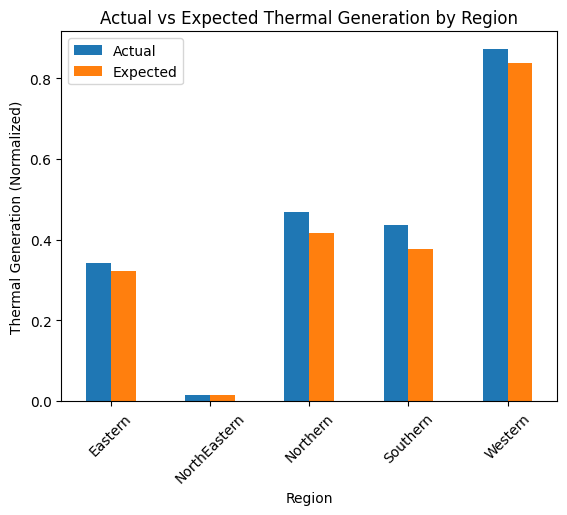

In [ ]:
thermal_generation=data.groupby('Region')[['Thermal Generation Actual (in MU)', 'Thermal Generation Estimated (in MU)']].mean()
thermal_generation.plot(kind='bar')
plt.title('Actual vs Expected Thermal Generation by Region')
plt.xlabel('Region')
plt.ylabel('Thermal Generation (Normalized)')
plt.xticks(rotation=45)
plt.legend(['Actual', 'Expected'])
plt.show()

In [ ]:
data.set_index('Date', inplace=True)

In [ ]:
thermal_data=data[['Region', 'Thermal Generation Actual (in MU)', 'Thermal Generation Estimated (in MU)']]
nuclear_data=data[['Region', 'Nuclear Generation Actual (in MU)', 'Nuclear Generation Estimated (in MU)']]
hydro_data=data[['Region', 'Hydro Generation Actual (in MU)', 'Hydro Generation Estimated (in MU)']]

print("Thermal Generation Data:")
print(thermal_data.head())

print("\nNuclear Generation Data:")
print(nuclear_data.head())

print("\nHydro Generation Data:")
print(hydro_data.head())

Thermal Generation Data:
                  Region  Thermal Generation Actual (in MU)  \
Date                                                          
2017-09-01      Northern                           0.442235   
2017-09-01       Western                           0.791071   
2017-09-01      Southern                           0.407855   
2017-09-01       Eastern                           0.309823   
2017-09-01  NorthEastern                           0.012120   

            Thermal Generation Estimated (in MU)  
Date                                              
2017-09-01                              0.329951  
2017-09-01                              0.707657  
2017-09-01                              0.395923  
2017-09-01                              0.291615  
2017-09-01                              0.002469  

Nuclear Generation Data:
                  Region  Nuclear Generation Actual (in MU)  \
Date                                                          
2017-09-01      Northern

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmo

Mean Squared Error: 6.061231685976933e-12


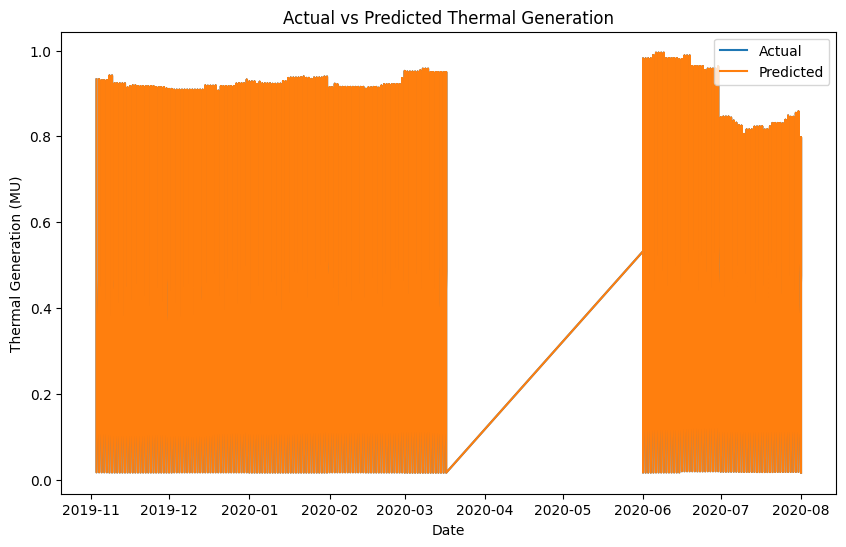

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse import hstack

#Encode the 'Region'
# encoder=OneHotEncoder(sparse=False)
# encoded_region=encoder.fit_transform(thermal_data[['Region']])
# encoded_region_df=pd.DataFrame(encoded_region,columns=encoder.get_feature_names_out(['Region']))
# thermal_data_encoded=pd.concat([thermal_data.drop(columns=['Region']).reset_index(),encoded_region_df], axis=1)


# Split data into training and testing sets (80% train, 20% test)
train_size=int(len(thermal_data)*0.8)
train,test=thermal_data.iloc[:train_size],thermal_data.iloc[train_size:]

# Define and fit SARIMA model
model=SARIMAX(train['Thermal Generation Actual (in MU)'],exog=train.iloc[:, 1:],order=(1, 1, 1),seasonal_order=(1, 1, 1, 12))
results=model.fit()

# Make predictions
exog_test=test.iloc[:, 1:]  # Exclude 'Thermal Generation Actual (in MU)' column
predictions =results.predict(start=len(train),end=len(train)+len(test)-1,exog=exog_test,dynamic=False)

# Evaluate model performance
mse=mean_squared_error(test['Thermal Generation Actual (in MU)'],predictions)
print(f"Mean Squared Error: {mse}")

# Visualize actual vs predicted values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(test.index,test['Thermal Generation Actual (in MU)'],label='Actual')
plt.plot(test.index,predictions,label='Predicted')
plt.xlabel('Date')
plt.ylabel('Thermal Generation (MU)')
plt.title('Actual vs Predicted Thermal Generation')
plt.legend()
plt.show()


Consumption data set

In [ ]:
df=pd.read_csv('/content/dataset_tk.csv')

In [ ]:
print(df.dtypes)
print('Shape:',df.shape)

Unnamed: 0            object
Punjab               float64
Haryana              float64
Rajasthan            float64
Delhi                float64
UP                   float64
Uttarakhand          float64
HP                   float64
J&K                  float64
Chandigarh           float64
Chhattisgarh         float64
Gujarat              float64
MP                   float64
Maharashtra          float64
Goa                  float64
DNH                  float64
Andhra Pradesh       float64
Telangana            float64
Karnataka            float64
Kerala               float64
Tamil Nadu           float64
Pondy                float64
Bihar                float64
Jharkhand            float64
Odisha               float64
West Bengal          float64
Sikkim               float64
Arunachal Pradesh    float64
Assam                float64
Manipur              float64
Meghalaya            float64
Mizoram              float64
Nagaland             float64
Tripura              float64
dtype: object


In [ ]:
df.head()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [ ]:
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [ ]:
df['Date']=pd.to_datetime(df['Date'], format="%d/%m/%Y %H:%M:%S")
df['Month']=df['Date'].dt.month
df['Day']=df['Date'].dt.day

In [ ]:
df.tail(3)

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Month,Day
500,2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6,12,3
501,2020-12-04,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3,12,4
502,2020-12-05,120.4,111.2,201.4,83.6,287.3,35.2,24.3,42.6,3.5,...,1.2,2.1,20.3,2.5,5.8,1.6,2.1,3.3,12,5


In [ ]:
print(df['Date'].min(),df['Date'].max())

2019-01-02 00:00:00 2020-12-05 00:00:00


In [ ]:
df.isnull().sum()

Date                 0
Punjab               0
Haryana              0
Rajasthan            0
Delhi                0
UP                   0
Uttarakhand          0
HP                   0
J&K                  0
Chandigarh           0
Chhattisgarh         0
Gujarat              0
MP                   0
Maharashtra          0
Goa                  0
DNH                  0
Andhra Pradesh       0
Telangana            0
Karnataka            0
Kerala               0
Tamil Nadu           0
Pondy                0
Bihar                0
Jharkhand            0
Odisha               0
West Bengal          0
Sikkim               0
Arunachal Pradesh    0
Assam                0
Manipur              0
Meghalaya            0
Mizoram              0
Nagaland             0
Tripura              0
Month                0
Day                  0
dtype: int64

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#numerical_columns=['Punjab', 'Haryana','Rajasthan','Delhi',
#'UP','Uttarakhand','HP','J&K','Chandigarh','Chhattisgarh','Gujarat','MP','Maharashtra','Goa','DNH','Andhra Pradesh','Telangana',
#'Karnataka','Kerala', 'Tamil Nadu', 'Pondy','Bihar','Jharkhand','Odisha','West Bengal','Sikkim','Arunachal Pradesh',
#'Assam','Manipur','Meghalaya', 'Mizoram', 'Nagaland','Tripura'   ]
# Initialize MinMaxScaler
#scaler=MinMaxScaler()
#df[numerical_columns]=scaler.fit_transform(df[numerical_columns])
#print(df.head)

In [ ]:
Telangana=pd.DataFrame(data=df,columns=['Telangana','Date','Month','Day'])
Telangana.set_index('Date',inplace=True)
Telangana.sort_values(by='Date')
Telangana.head()

,Telangana,Month,Day
Date,,,
2019-01-02,204.2,1,2
2019-01-03,204.5,1,3
2019-01-04,201.2,1,4
2019-01-05,201.7,1,5
2019-01-06,194.9,1,6


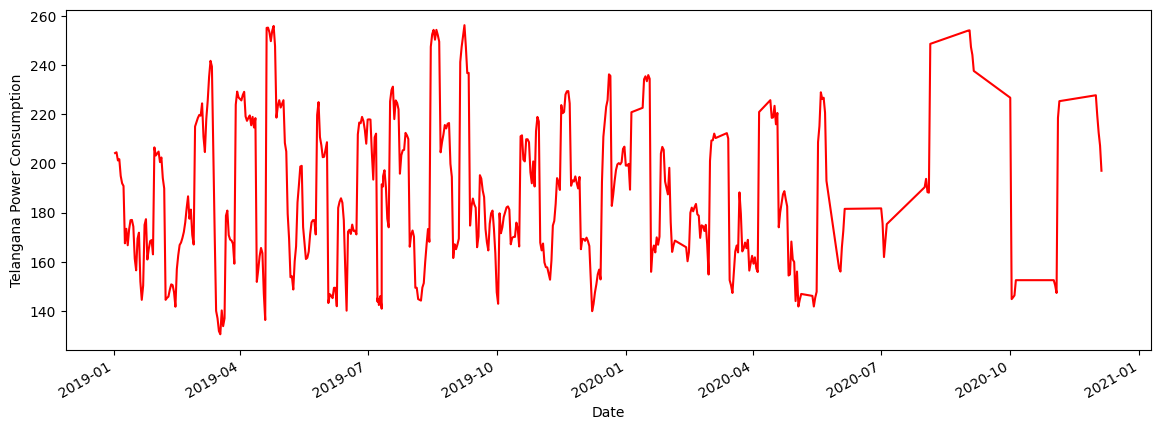

In [ ]:
import matplotlib.pyplot as plt
Telangana['Telangana'].plot(figsize=(14,5),color='Red')
plt.xlabel('Date')
plt.ylabel('Telangana Power Consumption')
plt.show()

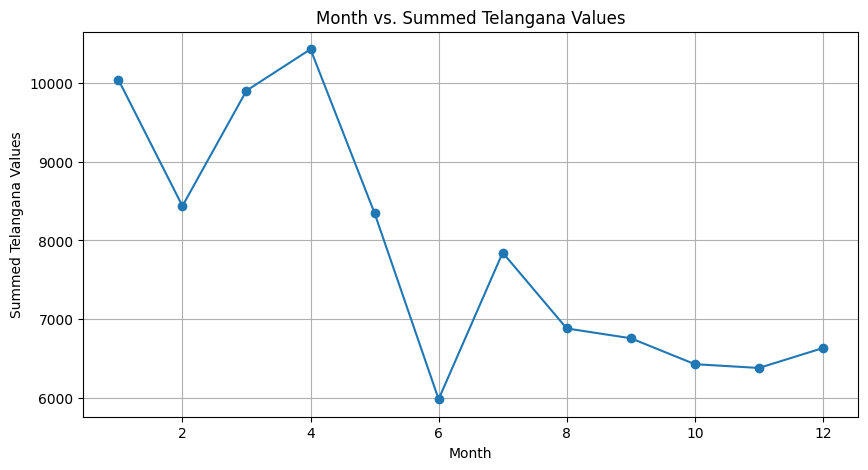

In [ ]:
monthly_data = df.groupby('Month')['Telangana'].sum().reset_index()

# Plotting Month vs. Summed Telangana values
plt.figure(figsize=(10, 5))
plt.plot(monthly_data['Month'], monthly_data['Telangana'], marker='o')
plt.xlabel('Month')
plt.ylabel('Summed Telangana Values')
plt.title('Month vs. Summed Telangana Values')
plt.grid(True)
plt.show()

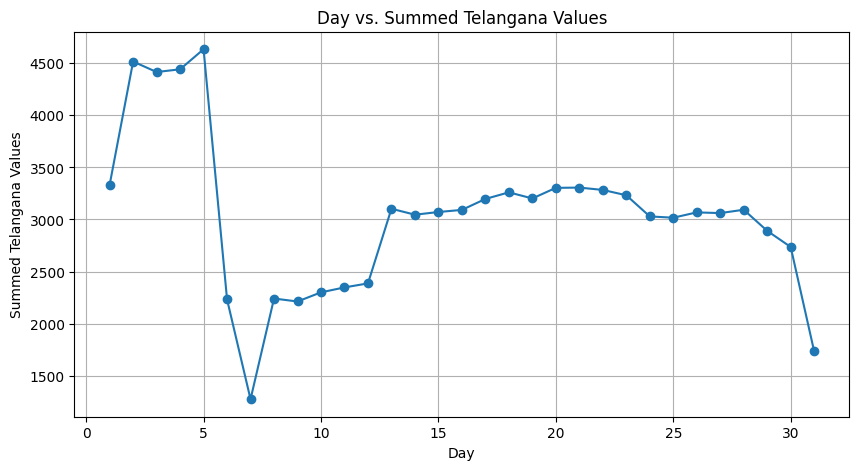

In [ ]:
daily_data = df.groupby('Day')['Telangana'].sum().reset_index()

# Plotting Month vs. Summed Telangana values
plt.figure(figsize=(10, 5))
plt.plot(daily_data['Day'], daily_data['Telangana'], marker='o')
plt.xlabel('Day')
plt.ylabel('Summed Telangana Values')
plt.title('Day vs. Summed Telangana Values')
plt.grid(True)
plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# metrics_df=pd.DataFrame(metrics)
# metrics_df.set_index('State', inplace=True)
# plt.figure(figsize=(12, 8))
# sns.heatmap(metrics_df[['MAE']].sort_values(by=['MAE'], ascending=False), annot=True, cmap='viridis', fmt='.2f')
# plt.title('Heat Map of Mean Absolute Error for Each State')
# plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

Test Mean Squared Error: 993.8696159858357


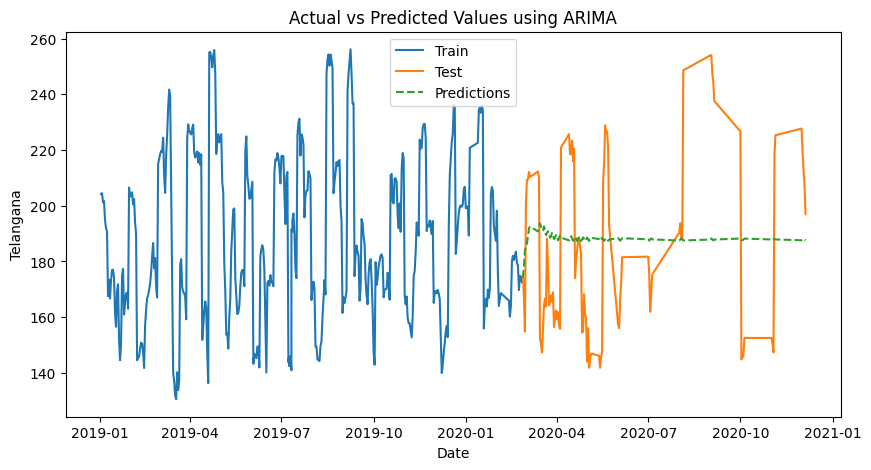

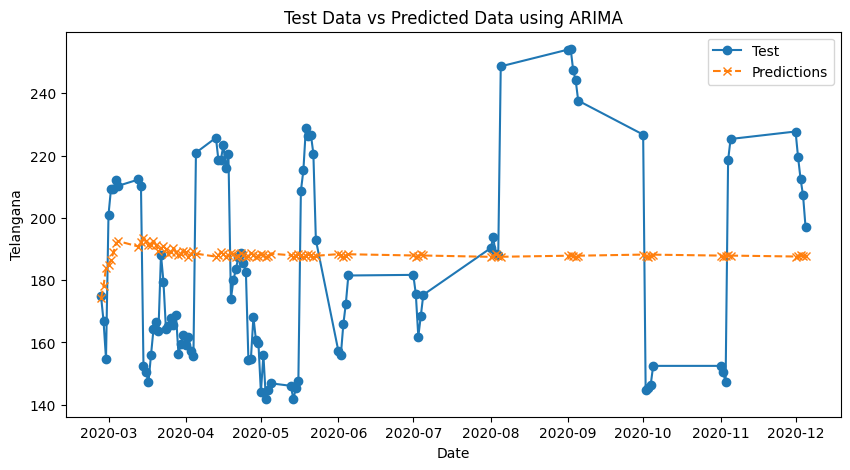

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
train_size=int(len(Telangana) * 0.8)
train,test=Telangana.iloc[:train_size],Telangana.iloc[train_size:]
# Fit the ARIMA model
model=ARIMA(train['Telangana'],order=(10, 0, 5))
model_fit=model.fit()
# Make predictions
predictions=model_fit.forecast(steps=len(test))
# Evaluate the model
test_mse=mean_squared_error(test['Telangana'],predictions)
print(f"Test Mean Squared Error: {test_mse}")
# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train.index,train['Telangana'],label='Train')
plt.plot(test.index,test['Telangana'],label='Test')
plt.plot(test.index,predictions,label='Predictions',linestyle='--')
plt.xlabel('Date')
plt.ylabel('Telangana')
plt.title('Actual vs Predicted Values using ARIMA')
plt.legend()
plt.show()

# Plotting test data vs predicted data
plt.figure(figsize=(10, 5))
plt.plot(test.index,test['Telangana'],label='Test',marker='o')
plt.plot(test.index,predictions,label='Predictions',linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Telangana')
plt.title('Test Data vs Predicted Data using ARIMA')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/

SARIMA Mean Squared Error: 1040.6118474251869


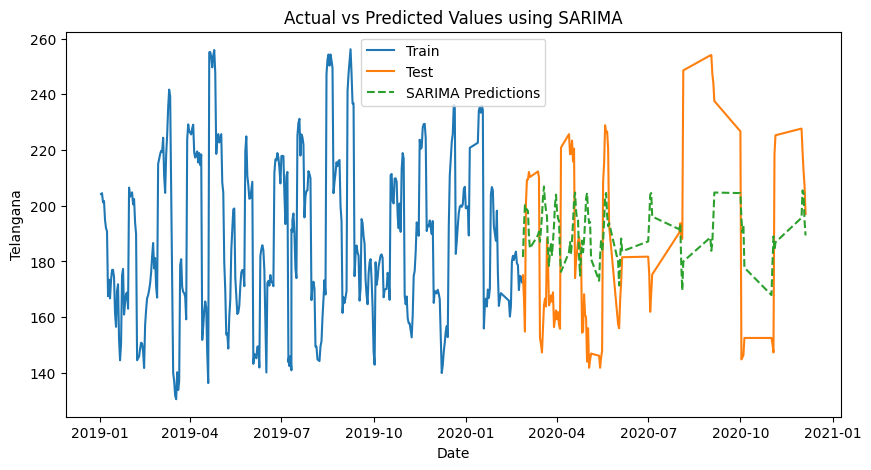

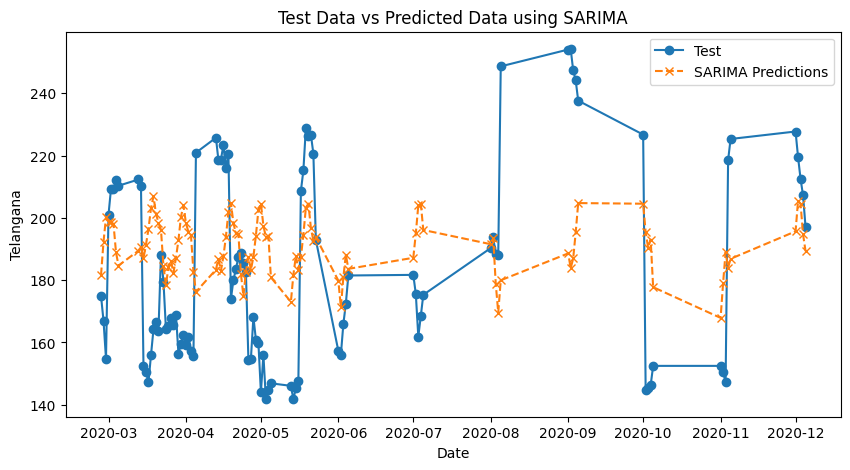

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#df = df.drop(['Month', 'Day'], axis=1)

train_size_tel = int(len(Telangana) * 0.8)
train_tel, test_tel = Telangana.iloc[:train_size_tel], Telangana.iloc[train_size_tel:]

# Define the SARIMA model
sarima_model_tel = SARIMAX(train_tel['Telangana'], order=(3, 0, 1), seasonal_order=(1, 2, 2, 12))
sarima_fit_tel = sarima_model_tel.fit(disp=False)

# Forecast
sarima_predictions_tel = sarima_fit_tel.predict(start=len(train_tel), end=len(Telangana) - 1, dynamic=False)

# Calculate mean squared error
sarima_mse_tel = mean_squared_error(test_tel['Telangana'], sarima_predictions_tel)
print(f"SARIMA Mean Squared Error: {sarima_mse_tel}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(train_tel.index, train_tel['Telangana'], label='Train')
plt.plot(test_tel.index, test_tel['Telangana'], label='Test')
plt.plot(test_tel.index, sarima_predictions_tel, label='SARIMA Predictions', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Telangana')
plt.title('Actual vs Predicted Values using SARIMA')
plt.legend()
plt.show()

# Plotting test data vs predicted data
plt.figure(figsize=(10, 5))
plt.plot(test_tel.index, test_tel['Telangana'], label='Test', marker='o')
plt.plot(test_tel.index, sarima_predictions_tel, label='SARIMA Predictions', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Telangana')
plt.title('Test Data vs Predicted Data using SARIMA')
plt.legend()
plt.show()

In [ ]:
# from itertools import product
# import warnings
# warnings.filterwarnings("ignore")
# p = range(0, 4)
# d = range(0, 2)
# q = range(0, 2)
# P = range(0, 2)
# D = range(0, 2)
# Q = range(0, 2)
# s = [12]  # Season length

# # Generate all different combinations of p, d, q and seasonal p, d, q
# parameters = list(product(p, d, q))
# seasonal_parameters = list(product(P, D, Q, s))

# # Function to fit and predict using SARIMA model
# def fit_predict_sarima(state_data, state_name):
#     train_size = int(len(state_data) * 0.8)
#     train, test = state_data.iloc[:train_size], state_data.iloc[train_size:]

#     results = []

#     for param in parameters:
#         for seasonal_param in seasonal_parameters:
#             try:
#                 model = SARIMAX(train[state_name],
#                                 order=param,
#                                 seasonal_order=seasonal_param,
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)
#                 result = model.fit(disp=False)

#                 # Forecast
#                 predictions = result.predict(start=len(train), end=len(state_data) - 1, dynamic=False)

#                 # Calculate mean squared error
#                 mse = mean_squared_error(test[state_name], predictions)
#                 results.append((param, seasonal_param, mse))

#                 print(f"SARIMA{param}x{seasonal_param} - MSE: {mse}")

#             except Exception as e:
#                 print(f"SARIMA{param}x{seasonal_param} - Exception: {e}")
#                 continue

#     return results

# # Example state data (replace 'Telangana' with the actual state name)
# results = fit_predict_sarima(df, 'Telangana')

# # Sort results by MSE
# results = sorted(results, key=lambda x: x[2])

# # Display the best result
# print(f"\nBest SARIMA parameters: {results[0][0]}x{results[0][1]} - MSE: {results[0][2]}")

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

prophet_df=pd.DataFrame(data=df,columns=['Telangana','Date'])
prophet_df.rename(columns={"Date" : "ds", "Telangana" : "y"},inplace=True)
prophet_df.head()

model1=Prophet(seasonality_mode='multiplicative',yearly_seasonality=20)
model1.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeh5ohly0/n8l9d556.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeh5ohly0/do313zvx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99590', 'data', 'file=/tmp/tmpeh5ohly0/n8l9d556.json', 'init=/tmp/tmpeh5ohly0/do313zvx.json', 'output', 'file=/tmp/tmpeh5ohly0/prophet_modellhcdbkss/prophet_model-20240610122650.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:26:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


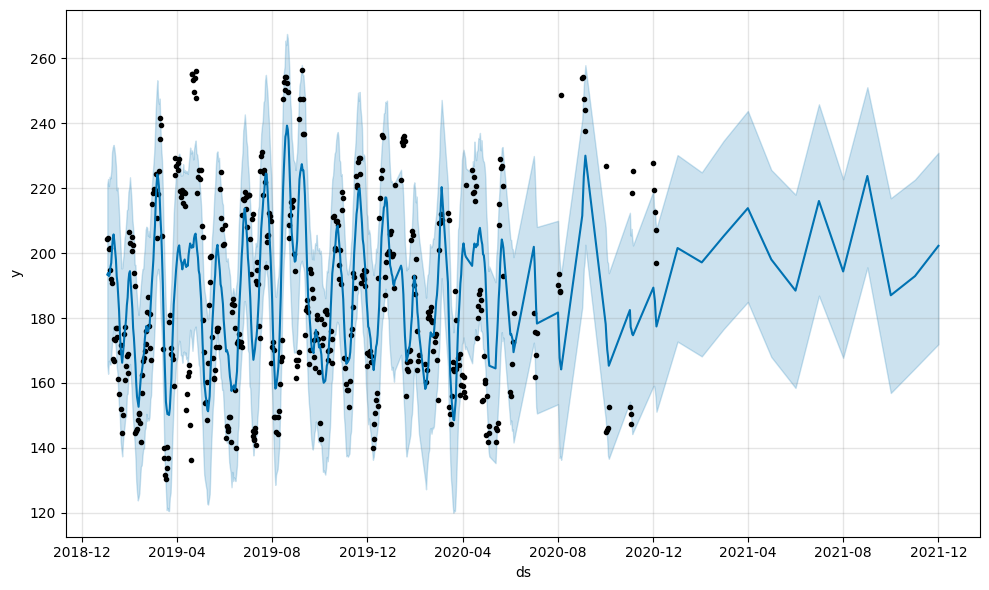

In [ ]:
train_size=int(len(df) * 0.8)
train,test=df.iloc[:train_size],df.iloc[train_size:]
future=model1.make_future_dataframe(periods=12,freq='MS')
forecast=model1.predict(future)
fig=model1.plot(forecast)
plt.show()

In [ ]:
train_size=int(len(prophet_df)*0.8)
train, test=prophet_df.iloc[:train_size],prophet_df.iloc[train_size:]
test_predictions=forecast[['ds', 'yhat']].iloc[-len(test):]
test_mse=mean_squared_error(test['y'],test_predictions['yhat'])
print(f"Test Mean Squared Error: {test_mse}")

Test Mean Squared Error: 1433.371646199389


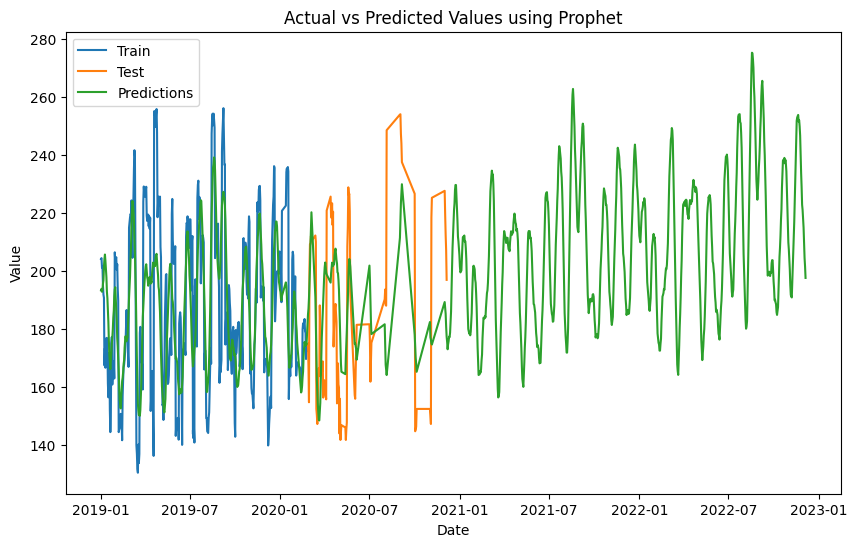

In [ ]:
future=model1.make_future_dataframe(periods=365 * 2)  # Forecast for 2 years
# Make predictions
forecast=model1.predict(future)
# Plot the forecast
fig,ax=plt.subplots(figsize=(10, 6))
ax.plot(train['ds'], train['y'], label='Train')
ax.plot(test['ds'], test['y'], label='Test')
ax.plot(forecast['ds'], forecast['yhat'], label='Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Actual vs Predicted Values using Prophet')
ax.legend()
plt.show()

In [ ]:
forecast.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2019-01-02,189.008988,163.973163,221.668325,189.008988,189.008988,0.023096,0.023096,0.023096,0.007136,0.007136,0.007136,0.015960,0.015960,0.015960,0.0,0.0,0.0,193.374266
1,2019-01-03,189.004565,165.914536,220.612206,189.004565,189.004565,0.025954,0.025954,0.025954,0.010999,0.010999,0.010999,0.014956,0.014956,0.014956,0.0,0.0,0.0,193.910045
2,2019-01-04,189.000141,165.801002,221.048964,189.000141,189.000141,0.020574,0.020574,0.020574,0.001123,0.001123,0.001123,0.019451,0.019451,0.019451,0.0,0.0,0.0,192.888584


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeh5ohly0/z1lit4a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeh5ohly0/xji7lg8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55220', 'data', 'file=/tmp/tmpeh5ohly0/z1lit4a7.json', 'init=/tmp/tmpeh5ohly0/xji7lg8f.json', 'output', 'file=/tmp/tmpeh5ohly0/prophet_modelxnjcxzp7/prophet_model-20240610122652.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:26:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:26:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/

                State       MAE
0              Punjab  7.980244
1             Haryana  7.434237
2           Rajasthan  6.414129
3               Delhi  8.098062
4                  UP  6.425791
5         Uttarakhand  7.949549
6                  HP  7.737023
7                 J&K  6.775001
8          Chandigarh  7.320393
9        Chhattisgarh  7.658027
10            Gujarat  7.477189
11                 MP  6.134070
12        Maharashtra  7.205679
13                Goa  8.120130
14                DNH  8.464102
15     Andhra Pradesh  6.962666
16          Telangana  6.954557
17          Karnataka  8.374247
18             Kerala  7.823394
19         Tamil Nadu  7.528401
20              Pondy  8.236910
21              Bihar  7.870431
22          Jharkhand  7.494558
23             Odisha  6.081477
24        West Bengal  7.381776
25             Sikkim  8.936163
26  Arunachal Pradesh  8.960392
27              Assam  8.765747
28            Manipur  7.053606
29          Meghalaya  7.436469
30      

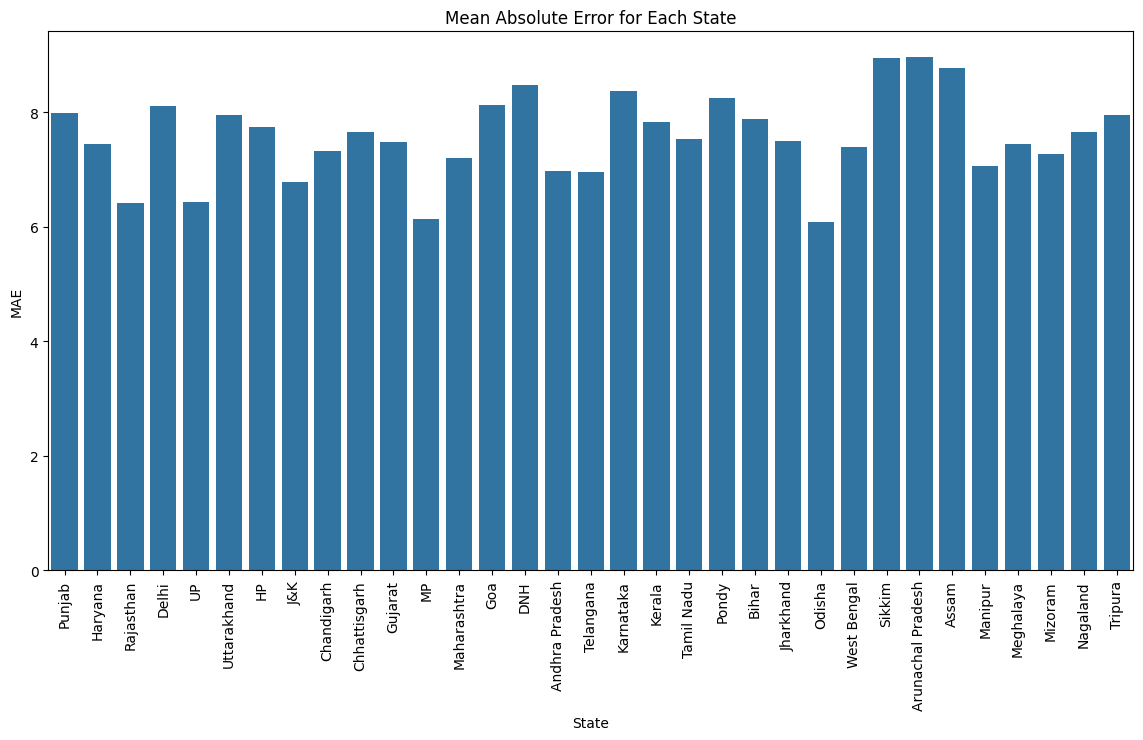

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data creation for demonstration
date_rng=pd.date_range(start='1/2/2019', end='5/12/2024', freq='MS')
np.random.seed(41)
df1=pd.DataFrame(date_rng, columns=['DateTime'])
states=['Punjab', 'Haryana','Rajasthan','Delhi',
'UP','Uttarakhand','HP','J&K','Chandigarh','Chhattisgarh','Gujarat','MP','Maharashtra','Goa','DNH','Andhra Pradesh','Telangana',
'Karnataka','Kerala', 'Tamil Nadu', 'Pondy','Bihar','Jharkhand','Odisha','West Bengal','Sikkim','Arunachal Pradesh',
'Assam','Manipur','Meghalaya', 'Mizoram', 'Nagaland','Tripura'   ]
for state in states:
    df1[state]=np.random.randn(len(df1))*10+100  # Random data generation for example
def evaluate_prophet_model(state_data,state_name):
    df=state_data[['DateTime',state_name]].rename(columns={"DateTime":"ds",state_name:"y"})
    model=Prophet(seasonality_mode='multiplicative',yearly_seasonality=4,daily_seasonality=True)
    model.fit(df)
    future=model.make_future_dataframe(periods=12,freq='MS')
    forecast=model.predict(future)
    forecast=forecast[['ds','yhat']].merge(df,on='ds',how='left')
    mae=mean_absolute_error(forecast['y'].dropna(),forecast['yhat'][:len(forecast['y'].dropna())])
    return mae
metrics={'State':[],'MAE':[]}
states=df1.columns[1:].tolist()  # Exclude 'DateTime' column from state
for state in states:
    mae=evaluate_prophet_model(df1,state)
    metrics['State'].append(state)
    metrics['MAE'].append(mae)
metrics_df=pd.DataFrame(metrics)
print(metrics_df)
# Plotting MAE for each state
plt.figure(figsize=(14, 7))
sns.barplot(x='State',y='MAE',data=metrics_df)
plt.xticks(rotation=90)
plt.title('Mean Absolute Error for Each State')
plt.show()

In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.1 MB/s eta 0:00:00


In [ ]:
from ipywidgets import interact, widgets
from IPython.display import display, clear_output

def evaluate_prophet_model(state_data, state_name, target_date):
    df = state_data[['DateTime', state_name]].rename(columns={"DateTime": "ds", state_name: "y"})
    model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=4, daily_seasonality=True)
    model.fit(df)
    # Ensure future dataframe includes the target date
    last_date = df['ds'].max()
    future_periods = ((pd.to_datetime(target_date) - last_date).days // 30) + 1
    future = model.make_future_dataframe(periods=future_periods, freq='MS')
    forecast = model.predict(future)
    forecast = forecast[['ds', 'yhat']].merge(df, on='ds', how='left')
    # Filter the forecast for the target date
    target_forecast = forecast[forecast['ds'] == target_date]
    if not target_forecast.empty:
        return df, forecast, target_forecast['yhat'].values[0]
    else:
        return df, forecast, None

def plot_state_data(state, target_date):
    df, forecast, prediction = evaluate_prophet_model(df1, state, target_date)
    plt.figure(figsize=(14, 7))
    plt.plot(df['ds'], df['y'], label='Actual', color='blue', linewidth=2)
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red', linestyle='--', linewidth=2)
    plt.title(f"Energy Consumption Forecast for {state}")
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

    return prediction

In [ ]:
# Create the state and date widgets
state_widget = widgets.Dropdown(
    options=states,
    description='State:',
)

date_widget = widgets.DatePicker(
    description='Date:',
    disabled=False
)

output = widgets.Output()

def on_button_clicked(b):
    with output:
        clear_output()
        state = state_widget.value
        date = date_widget.value
        if date:
            target_date = pd.to_datetime(date).strftime('%Y-%m-%d')
            prediction = plot_state_data(state, target_date)
            if prediction is not None:
                if pd.to_datetime(target_date) <= df1['DateTime'].max():
                    actual_value = df1[df1['DateTime'] == pd.to_datetime(target_date)][state].values[0]
                    print(f"Actual energy consumption for {state} on {target_date}: {actual_value:.2f}")
                else:
                    print(f"Predicted energy consumption for {state} on {target_date}: {prediction:.2f}")
        else:
            print("Please select a date.")

# Create a button to submit the inputs
button = widgets.Button(description="Predict")
button.on_click(on_button_clicked)

# Display the widgets
display(state_widget, date_widget, button, output)

Dropdown(description='State:', options=('Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP', 'Uttarakhand', 'HP', …

DatePicker(value=None, description='Date:')

Button(description='Predict', style=ButtonStyle())

Output()

In [ ]:
# !pip install Flask flask-ngrok

In [ ]:
# from flask import Flask, render_template, request, send_file
# from flask_ngrok import run_with_ngrok
# import io

In [ ]:
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip

--2024-06-10 12:27:44--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  49.8MB/s    in 0.3s    

2024-06-10 12:27:44 (49.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
# !.2hBlnRsSQ8GUNafP0nQL3Aevjt4_62M5uwd15xQttByPfm58T

/bin/bash: line 1: .2hBlnRsSQ8GUNafP0nQL3Aevjt4_62M5uwd15xQttByPfm58T: command not found


In [ ]:
# import subprocess
# subprocess.run(["./ngrok", "http", "5000"])

CompletedProcess(args=['./ngrok', 'http', '5000'], returncode=1)

In [ ]:
# def plot_state_data_2(state):
#     df, forecast, mae = evaluate_prophet_model(df1, state)

#     plt.figure(figsize=(14, 7))
#     plt.plot(df['ds'], df['y'], label='Train', color='blue', linewidth=2)
#     plt.plot(forecast['ds'], forecast['y'], label='Test', color='green', linewidth=2)
#     plt.plot(forecast['ds'], forecast['yhat'], label='Prediction', color='red', linestyle='--', linewidth=2)
#     plt.title(f"Train, Test, and Prediction for {state} (MAE: {mae:.2f})")
#     plt.xlabel('Date')
#     plt.ylabel('Value')
#     plt.legend()
#     plt.tight_layout()

#     img = io.BytesIO()
#     plt.savefig(img, format='png')
#     img.seek(0)
#     plt.close()
#     return img

# app = Flask(__name__)
# run_with_ngrok(app)

# @app.route('/', methods=['GET', 'POST'])
# def index():
#     if request.method == 'POST':
#         state = request.form['state']
#         img = plot_state_data_2(state)
#         return send_file(img, mimetype='image/png')
#     return '''
#         <form method="POST">
#             <label for="state">Select a State:</label>
#             <select name="state" id="state">
#                 {options}
#             </select>
#             <button type="submit">Submit</button>
#         </form>
#     '''.format(options='\n'.join([f'<option value="{state}">{state}</option>' for state in states]))

# if __name__ == '__main__':
#     app.run()